# Task

As a regional/operational analyst, provide insights into the performance across regions, states, and cities.  Identify operational factors to a location's performance and where there are opportunities to expand or consolidate.

# Load & Prep Data


SubTask: Connect to superstore data

In [ ]:
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

auth.authenticate_user()
project = 'mgmt599-molneeric' # Project ID removed to avoid hardcoding
client = bigquery.Client(project=project)

table = 'mgmt599-molneeric.mgmt599_data.superstore' # Table ID removed to avoid hardcoding

superstore_df = client.list_rows(table).to_dataframe()
display(superstore_df.head())
display(superstore_df.info())

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,5769,CA-2015-154900,2015-02-25,2015-03-01,Standard Class,SS-20875,Sung Shariari,Consumer,United States,Leominster,...,1453,East,OFF-LA-10001641,Office Supplies,Labels,Avery 518,3.15,1,0.0,1.5120
1,5770,CA-2015-154900,2015-02-25,2015-03-01,Standard Class,SS-20875,Sung Shariari,Consumer,United States,Leominster,...,1453,East,OFF-PA-10002377,Office Supplies,Paper,Adams Telephone Message Book W/Dividers/Space ...,22.72,4,0.0,10.2240
2,9028,US-2016-152415,2016-09-17,2016-09-22,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,Marlborough,...,1752,East,FUR-FU-10002597,Furniture,Furnishings,"C-Line Magnetic Cubicle Keepers, Clear Polypro...",14.82,3,0.0,6.2244
3,9029,US-2016-152415,2016-09-17,2016-09-22,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,Marlborough,...,1752,East,FUR-FU-10004864,Furniture,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",191.82,3,0.0,61.3824
4,8332,CA-2016-153269,2016-03-09,2016-03-12,First Class,PS-18760,Pamela Stobb,Consumer,United States,Andover,...,1810,East,OFF-ST-10004634,Office Supplies,Storage,"Personal Folder Holder, Ebony",11.21,1,0.0,3.3630


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   Int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   dbdate 
 3   Ship Date      9994 non-null   dbdate 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   Int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

None

SubTask: Aggregrate data to order level

In [ ]:
agg_superstore_df = superstore_df.groupby(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region'])[['Sales', 'Profit', 'Quantity']].sum().reset_index()

# Rename the aggregated columns for clarity
agg_superstore_df = agg_superstore_df.rename(columns={'Sales': 'Total_Sales', 'Profit': 'Total_Profit', 'Quantity': 'Total_Quantity'})

# Display the first few rows of the aggregated dataframe
display(agg_superstore_df.head())

# Display information about the columns
display(agg_superstore_df.info())

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Total_Sales,Total_Profit,Total_Quantity
0,CA-2014-100006,2014-09-07,2014-09-13,Standard Class,DK-13375,Dennis Kane,Consumer,United States,New York City,New York,10024,East,377.970,109.6113,3
1,CA-2014-100090,2014-07-08,2014-07-12,Standard Class,EB-13705,Ed Braxton,Corporate,United States,San Francisco,California,94122,West,699.192,-19.0890,9
2,CA-2014-100293,2014-03-14,2014-03-18,Standard Class,NF-18475,Neil Französisch,Home Office,United States,Jacksonville,Florida,32216,South,91.056,31.8696,6
3,CA-2014-100328,2014-01-28,2014-02-03,Standard Class,JC-15340,Jasper Cacioppo,Consumer,United States,New York City,New York,10024,East,3.928,1.3257,1
4,CA-2014-100363,2014-04-08,2014-04-15,Standard Class,JM-15655,Jim Mitchum,Corporate,United States,Glendale,Arizona,85301,West,21.376,7.7192,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5009 entries, 0 to 5008
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        5009 non-null   object 
 1   Order Date      5009 non-null   dbdate 
 2   Ship Date       5009 non-null   dbdate 
 3   Ship Mode       5009 non-null   object 
 4   Customer ID     5009 non-null   object 
 5   Customer Name   5009 non-null   object 
 6   Segment         5009 non-null   object 
 7   Country         5009 non-null   object 
 8   City            5009 non-null   object 
 9   State           5009 non-null   object 
 10  Postal Code     5009 non-null   Int64  
 11  Region          5009 non-null   object 
 12  Total_Sales     5009 non-null   float64
 13  Total_Profit    5009 non-null   float64
 14  Total_Quantity  5009 non-null   Int64  
dtypes: Int64(2), dbdate(2), float64(2), object(9)
memory usage: 596.9+ KB


None

SubTask: Add metric [Days_to_Ship]

In [ ]:
# Ensure 'Order Date' and 'Ship Date' are in datetime format
agg_superstore_df['Order Date'] = pd.to_datetime(agg_superstore_df['Order Date'])
agg_superstore_df['Ship Date'] = pd.to_datetime(agg_superstore_df['Ship Date'])

# Calculate the difference in days
agg_superstore_df['Days_to_Ship'] = (agg_superstore_df['Ship Date'] - agg_superstore_df['Order Date']).dt.days

# Display the first few rows with the new column
display(agg_superstore_df.head())

# Display information about the columns to show the new column and its type
display(agg_superstore_df.info())

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Total_Sales,Total_Profit,Total_Quantity,Days_to_Ship
0,CA-2014-100006,2014-09-07,2014-09-13,Standard Class,DK-13375,Dennis Kane,Consumer,United States,New York City,New York,10024,East,377.970,109.6113,3,6
1,CA-2014-100090,2014-07-08,2014-07-12,Standard Class,EB-13705,Ed Braxton,Corporate,United States,San Francisco,California,94122,West,699.192,-19.0890,9,4
2,CA-2014-100293,2014-03-14,2014-03-18,Standard Class,NF-18475,Neil Französisch,Home Office,United States,Jacksonville,Florida,32216,South,91.056,31.8696,6,4
3,CA-2014-100328,2014-01-28,2014-02-03,Standard Class,JC-15340,Jasper Cacioppo,Consumer,United States,New York City,New York,10024,East,3.928,1.3257,1,6
4,CA-2014-100363,2014-04-08,2014-04-15,Standard Class,JM-15655,Jim Mitchum,Corporate,United States,Glendale,Arizona,85301,West,21.376,7.7192,5,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5009 entries, 0 to 5008
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        5009 non-null   object        
 1   Order Date      5009 non-null   datetime64[ns]
 2   Ship Date       5009 non-null   datetime64[ns]
 3   Ship Mode       5009 non-null   object        
 4   Customer ID     5009 non-null   object        
 5   Customer Name   5009 non-null   object        
 6   Segment         5009 non-null   object        
 7   Country         5009 non-null   object        
 8   City            5009 non-null   object        
 9   State           5009 non-null   object        
 10  Postal Code     5009 non-null   Int64         
 11  Region          5009 non-null   object        
 12  Total_Sales     5009 non-null   float64       
 13  Total_Profit    5009 non-null   float64       
 14  Total_Quantity  5009 non-null   Int64         
 15  Days

None

SubTask: Create Performance Metrics

In [ ]:
location_performance = agg_superstore_df.groupby(['Region', 'State', 'City']).agg(
    Sum_Total_Sales=('Total_Sales', 'sum'),
    Sum_Total_Profit=('Total_Profit', 'sum'),
    Average_Total_Sales=('Total_Sales', 'mean'),
    Average_Total_Profit=('Total_Profit', 'mean')
).reset_index()

location_performance['Profit_to_Sales_Ratio'] = location_performance['Sum_Total_Profit'] / location_performance['Sum_Total_Sales']

display(location_performance.head())
display(location_performance.info())

,Region,State,City,Sum_Total_Sales,Sum_Total_Profit,Average_Total_Sales,Average_Total_Profit,Profit_to_Sales_Ratio
0,Central,Illinois,Arlington Heights,14.112,1.2348,14.112000,1.234800,0.087500
1,Central,Illinois,Aurora,7572.968,-1894.7196,378.648400,-94.735980,-0.250195
2,Central,Illinois,Bloomington,963.940,-432.1283,160.656667,-72.021383,-0.448294
3,Central,Illinois,Bolingbrook,218.308,-4.6610,72.769333,-1.553667,-0.021351
4,Central,Illinois,Buffalo Grove,831.399,-89.6478,415.699500,-44.823900,-0.107828


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604 entries, 0 to 603
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Region                 604 non-null    object 
 1   State                  604 non-null    object 
 2   City                   604 non-null    object 
 3   Sum_Total_Sales        604 non-null    float64
 4   Sum_Total_Profit       604 non-null    float64
 5   Average_Total_Sales    604 non-null    float64
 6   Average_Total_Profit   604 non-null    float64
 7   Profit_to_Sales_Ratio  604 non-null    float64
dtypes: float64(5), object(3)
memory usage: 37.9+ KB


None

# Discover (Initial Exploration)

SubTask: Identify the top and bottom performing locations

In [ ]:
# Sort by Sum_Total_Sales
top_sales_locations = location_performance.sort_values(by='Sum_Total_Sales', ascending=False).head(10)
bottom_sales_locations = location_performance.sort_values(by='Sum_Total_Sales', ascending=True).head(10)

print("Top 10 Locations by Total Sales:")
display(top_sales_locations)

print("\nBottom 10 Locations by Total Sales:")
display(bottom_sales_locations)

# Sort by Sum_Total_Profit
top_profit_locations = location_performance.sort_values(by='Sum_Total_Profit', ascending=False).head(10)
bottom_profit_locations = location_performance.sort_values(by='Sum_Total_Profit', ascending=True).head(10)

print("\nTop 10 Locations by Total Profit:")
display(top_profit_locations)

print("\nBottom 10 Locations by Total Profit:")
display(bottom_profit_locations)

# Sort by Profit_to_Sales_Ratio (handle potential division by zero or inf values if any)
# For now, assuming no division by zero based on previous describe, but good practice to consider
top_profit_ratio_locations = location_performance.sort_values(by='Profit_to_Sales_Ratio', ascending=False).head(10)
bottom_profit_ratio_locations = location_performance.sort_values(by='Profit_to_Sales_Ratio', ascending=True).head(10)

print("\nTop 10 Locations by Profit to Sales Ratio:")
display(top_profit_ratio_locations)

print("\nBottom 10 Locations by Profit to Sales Ratio:")
display(bottom_profit_ratio_locations)

Top 10 Locations by Total Sales:


,Region,State,City,Sum_Total_Sales,Sum_Total_Profit,Average_Total_Sales,Average_Total_Profit,Profit_to_Sales_Ratio
253,East,New York,New York City,256368.1610,62036.9837,569.707024,137.859964,0.241984
480,West,California,Los Angeles,175851.3410,30440.7579,457.946201,79.272807,0.173105
600,West,Washington,Seattle,119540.7420,29156.0967,563.871425,137.528758,0.243901
507,West,California,San Francisco,112669.0920,17507.3854,425.166385,66.065605,0.155388
291,East,Pennsylvania,Philadelphia,109077.0130,-13837.7674,411.611370,-52.217990,-0.126862
146,Central,Texas,Houston,64504.7604,-10153.5485,343.110428,-54.008237,-0.157408
7,Central,Illinois,Chicago,48539.5410,-6654.5688,283.856965,-38.915607,-0.137096
506,West,California,San Diego,47521.0290,6377.1960,540.011693,72.468136,0.134197
65,Central,Michigan,Detroit,42446.9440,13181.7908,800.885736,248.713034,0.310547
329,South,Florida,Jacksonville,39133.3280,-2445.6608,1029.824421,-64.359495,-0.062496



Bottom 10 Locations by Total Sales:


,Region,State,City,Sum_Total_Sales,Sum_Total_Profit,Average_Total_Sales,Average_Total_Profit,Profit_to_Sales_Ratio
119,Central,Texas,Abilene,1.392,-3.7584,1.392,-3.7584,-2.700000
269,East,Ohio,Elyria,1.824,-1.3984,1.824,-1.3984,-0.766667
330,South,Florida,Jupiter,2.064,0.1548,2.064,0.1548,0.075000
342,South,Florida,Pensacola,2.214,-1.4760,2.214,-1.4760,-0.666667
339,South,Florida,Ormond Beach,2.808,-1.9656,2.808,-1.9656,-0.700000
510,West,California,San Luis Obispo,3.620,1.1946,3.620,1.1946,0.330000
592,West,Washington,Everett,3.856,1.3978,3.856,1.3978,0.362500
586,West,Washington,Auburn,4.180,1.5048,4.180,1.5048,0.360000
315,South,Arkansas,Springdale,4.300,1.4190,4.300,1.4190,0.330000
577,West,Utah,Layton,4.960,2.3312,4.960,2.3312,0.470000



Top 10 Locations by Total Profit:


,Region,State,City,Sum_Total_Sales,Sum_Total_Profit,Average_Total_Sales,Average_Total_Profit,Profit_to_Sales_Ratio
253,East,New York,New York City,256368.161,62036.9837,569.707024,137.859964,0.241984
480,West,California,Los Angeles,175851.341,30440.7579,457.946201,79.272807,0.173105
600,West,Washington,Seattle,119540.742,29156.0967,563.871425,137.528758,0.243901
507,West,California,San Francisco,112669.092,17507.3854,425.166385,66.065605,0.155388
65,Central,Michigan,Detroit,42446.944,13181.7908,800.885736,248.713034,0.310547
39,Central,Indiana,Lafayette,19630.450,8976.0973,2804.350000,1282.299614,0.457254
197,East,Delaware,Newark,20448.050,8086.1715,705.105172,278.833500,0.395450
354,South,Georgia,Atlanta,17197.840,6993.6629,1011.637647,411.391935,0.406659
88,Central,Minnesota,Minneapolis,16870.540,6824.5846,1297.733846,524.968046,0.404527
506,West,California,San Diego,47521.029,6377.1960,540.011693,72.468136,0.134197



Bottom 10 Locations by Total Profit:


,Region,State,City,Sum_Total_Sales,Sum_Total_Profit,Average_Total_Sales,Average_Total_Profit,Profit_to_Sales_Ratio
291,East,Pennsylvania,Philadelphia,109077.0130,-13837.7674,411.611370,-52.217990,-0.126862
146,Central,Texas,Houston,64504.7604,-10153.5485,343.110428,-54.008237,-0.157408
167,Central,Texas,San Antonio,21843.5280,-7299.0502,809.019556,-270.335193,-0.334152
275,East,Ohio,Lancaster,8202.6250,-7149.6180,546.841667,-476.641200,-0.871626
7,Central,Illinois,Chicago,48539.5410,-6654.5688,283.856965,-38.915607,-0.137096
382,South,North Carolina,Burlington,12681.2820,-5894.5269,1811.611714,-842.075271,-0.464821
539,West,Colorado,Louisville,5070.4160,-3406.2095,422.534667,-283.850792,-0.671781
135,Central,Texas,Dallas,20131.9322,-2846.5257,251.649152,-35.581571,-0.141394
441,West,Arizona,Phoenix,11000.2570,-2790.8832,379.319207,-96.237352,-0.253711
329,South,Florida,Jacksonville,39133.3280,-2445.6608,1029.824421,-64.359495,-0.062496



Top 10 Locations by Profit to Sales Ratio:


,Region,State,City,Sum_Total_Sales,Sum_Total_Profit,Average_Total_Sales,Average_Total_Profit,Profit_to_Sales_Ratio
105,Central,Nebraska,Grand Island,15.96,7.9800,15.96,7.9800,0.500000
226,East,New Jersey,Atlantic City,23.36,11.6800,23.36,11.6800,0.500000
236,East,New Jersey,New Brunswick,14.77,7.1567,14.77,7.1567,0.484543
405,South,South Carolina,Summerville,406.94,196.9132,406.94,196.9132,0.483888
67,Central,Michigan,Holland,137.86,66.6588,68.93,33.3294,0.483525
448,West,California,Antioch,19.44,9.3312,19.44,9.3312,0.480000
249,East,New York,Lindenhurst,55.48,26.6304,55.48,26.6304,0.480000
76,Central,Michigan,Royal Oak,35.34,16.9632,17.67,8.4816,0.480000
461,West,California,Davis,32.40,15.5520,32.40,15.5520,0.480000
551,West,Montana,Bozeman,43.66,20.8106,43.66,20.8106,0.476651



Bottom 10 Locations by Profit to Sales Ratio:


,Region,State,City,Sum_Total_Sales,Sum_Total_Profit,Average_Total_Sales,Average_Total_Profit,Profit_to_Sales_Ratio
119,Central,Texas,Abilene,1.392,-3.7584,1.392000,-3.758400,-2.700000
156,Central,Texas,Mesquite,52.148,-87.6200,17.382667,-29.206667,-1.680218
21,Central,Illinois,Oswego,321.978,-536.1276,321.978000,-536.127600,-1.665106
27,Central,Illinois,Romeoville,8.952,-14.7708,8.952000,-14.770800,-1.650000
8,Central,Illinois,Danville,43.372,-69.3952,43.372000,-69.395200,-1.600000
157,Central,Texas,Missouri City,6.370,-9.5550,6.370000,-9.555000,-1.500000
136,Central,Texas,Deer Park,6.924,-10.3860,6.924000,-10.386000,-1.500000
537,West,Colorado,Littleton,72.294,-98.8018,72.294000,-98.801800,-1.366667
171,Central,Texas,Tyler,347.206,-443.7086,173.603000,-221.854300,-1.277940
6,Central,Illinois,Champaign,151.960,-182.3520,151.960000,-182.352000,-1.200000


# Investigate (Deep Analysis)

SubTask: Identify operational factors

In [ ]:
shipping_time_profit = agg_superstore_df.groupby('Days_to_Ship')['Total_Profit'].mean().reset_index()

print("Average Profit by Days to Ship:")
display(shipping_time_profit.sort_values(by='Days_to_Ship'))

Average Profit by Days to Ship:


,Days_to_Ship,Total_Profit
0,0,61.055431
1,1,41.435313
2,2,78.693503
3,3,52.801412
4,4,50.701906
5,5,54.181923
6,6,55.832161
7,7,66.012490


In [ ]:
shipping_mode_profit = agg_superstore_df.groupby('Ship Mode')['Total_Profit'].mean().reset_index()

print("Average Profit by Ship Mode:")
display(shipping_mode_profit.sort_values(by='Total_Profit', ascending=False))

Average Profit by Ship Mode:


,Ship Mode,Total_Profit
0,First Class,62.223431
1,Same Day,60.196056
2,Second Class,59.591945
3,Standard Class,54.805874


In [ ]:
# Aggregate the original superstore_df by Order ID, Ship Mode, Region, Category, and Sub-Category
product_shipping_region_profit = superstore_df.groupby(['Order ID', 'Ship Mode', 'Region', 'Category', 'Sub-Category'])['Profit'].sum().reset_index()

# Calculate the average profit for each Ship Mode, Region, Category, and Sub-Category combination
average_product_shipping_region_profit = product_shipping_region_profit.groupby(['Ship Mode', 'Region', 'Category', 'Sub-Category'])['Profit'].mean().reset_index()

print("Average Profit by Ship Mode, Region, Category, and Sub-Category:")
display(average_product_shipping_region_profit.sort_values(by=['Ship Mode', 'Region', 'Profit'], ascending=[True, True, False]))

Average Profit by Ship Mode, Region, Category, and Sub-Category:


,Ship Mode,Region,Category,Sub-Category,Profit
15,First Class,Central,Technology,Machines,418.021500
14,First Class,Central,Technology,Copiers,107.994600
7,First Class,Central,Office Supplies,Envelopes,66.706180
1,First Class,Central,Furniture,Chairs,60.761727
16,First Class,Central,Technology,Phones,46.699106
...,...,...,...,...,...
260,Standard Class,West,Office Supplies,Fasteners,3.600898
264,Standard Class,West,Office Supplies,Supplies,-0.945317
255,Standard Class,West,Furniture,Tables,-11.357258
252,Standard Class,West,Furniture,Bookcases,-34.739348


/tmp/ipython-input-17-875060013.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_profit_combinations['Combination'] = top_profit_combinations['Ship Mode'] + ' - ' + top_profit_combinations['Region'] + ' - ' + top_profit_combinations['Category'] + ' - ' + top_profit_combinations['Sub-Category']
/tmp/ipython-input-17-875060013.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottom_profit_combinations['Combination'] = bottom_profit_combinations['Ship Mode'] + ' - ' + bottom_profit_combinations['Re

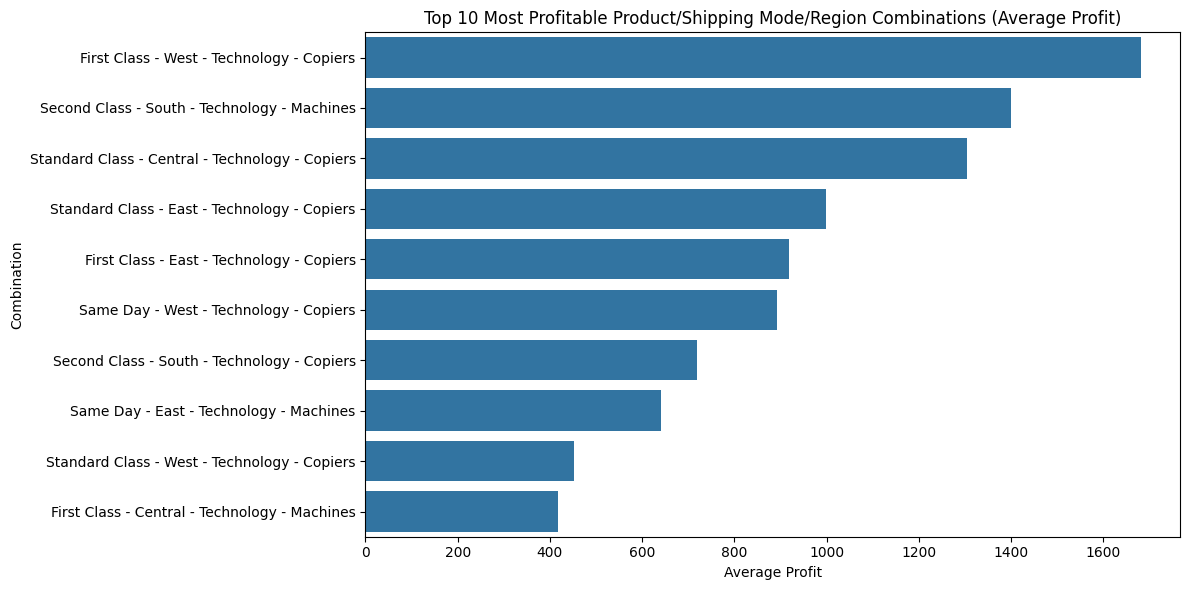

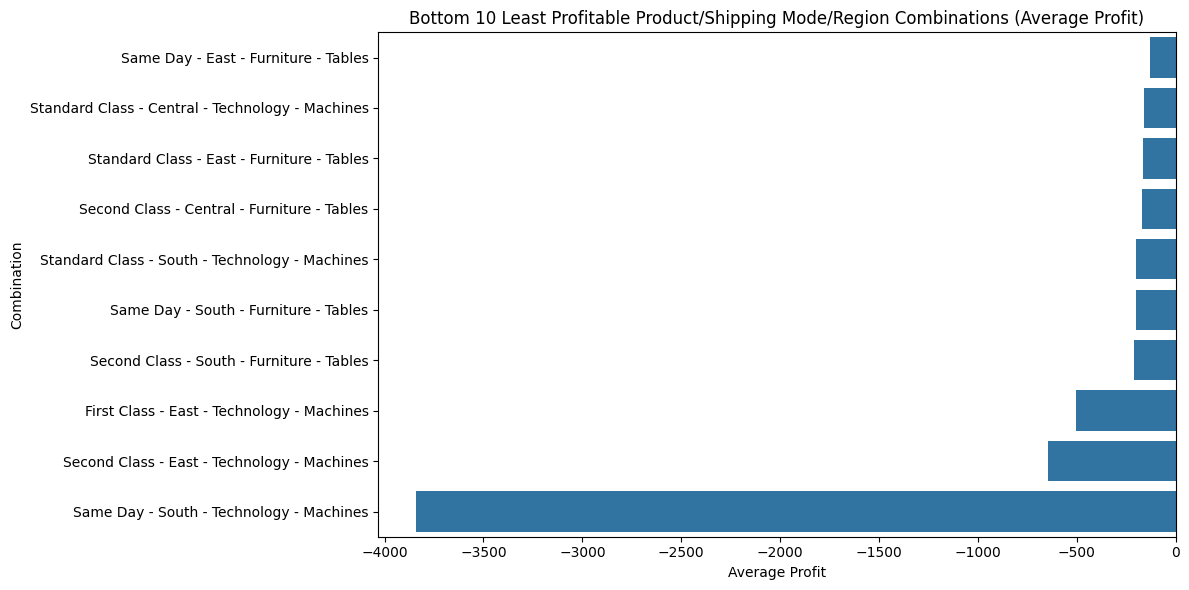

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by Profit to get top and bottom combinations
average_product_shipping_region_profit_sorted = average_product_shipping_region_profit.sort_values(by='Profit', ascending=False)

# Select top and bottom 10
top_profit_combinations = average_product_shipping_region_profit_sorted.head(10)
bottom_profit_combinations = average_product_shipping_region_profit_sorted.tail(10)

# Create combined label for visualization
top_profit_combinations['Combination'] = top_profit_combinations['Ship Mode'] + ' - ' + top_profit_combinations['Region'] + ' - ' + top_profit_combinations['Category'] + ' - ' + top_profit_combinations['Sub-Category']
bottom_profit_combinations['Combination'] = bottom_profit_combinations['Ship Mode'] + ' - ' + bottom_profit_combinations['Region'] + ' - ' + bottom_profit_combinations['Category'] + ' - ' + bottom_profit_combinations['Sub-Category']

# Visualize top 10
plt.figure(figsize=(12, 6))
sns.barplot(x='Profit', y='Combination', data=top_profit_combinations)
plt.title('Top 10 Most Profitable Product/Shipping Mode/Region Combinations (Average Profit)')
plt.xlabel('Average Profit')
plt.ylabel('Combination')
plt.tight_layout()
plt.show()

# Visualize bottom 10
plt.figure(figsize=(12, 6))
sns.barplot(x='Profit', y='Combination', data=bottom_profit_combinations)
plt.title('Bottom 10 Least Profitable Product/Shipping Mode/Region Combinations (Average Profit)')
plt.xlabel('Average Profit')
plt.ylabel('Combination')
plt.tight_layout()
plt.show()

# Validate (Quality Assurance)

## Task
Analyze the quality of data and perform statistical significance testing against the "mgmt599-molneeric.mgmt599_data.agg_superstore" table.

## Data quality analysis

### Subtask:
Assess the quality of the `agg_superstore_df`, including checking for missing values, duplicates, and inconsistencies in data types or formats.


**Reasoning**:
Check for missing values, duplicates, and data types in the `agg_superstore_df` to assess data quality.



In [ ]:
# Check for missing values
print("Missing values per column:")
display(agg_superstore_df.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows:")
display(agg_superstore_df.duplicated().sum())

# Display data types
print("\nData types:")
display(agg_superstore_df.dtypes)

Missing values per column:


,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0
State,0



Number of duplicate rows:


np.int64(0)


Data types:


,0
Order ID,object
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object
State,object


## Identify variables for testing

### Subtask:
Determine which variables are relevant for statistical significance testing based on the analysis goals.


**Reasoning**:
Review the analysis goals and identify relevant variables for statistical testing based on the available columns and their data types in `agg_superstore_df`.



In [ ]:
# Analysis goals from the initial task:
# - Provide insights into the performance across regions, states, and cities.
# - Identify operational factors to a location's performance.
# - Identify where there are opportunities to expand or consolidate.

# Relevant variables from agg_superstore_df for statistical testing:
# - 'Region', 'State', 'City': These represent the locations and are crucial for analyzing performance across different geographical areas.
# - 'Ship Mode': An operational factor that can influence performance.
# - 'Total_Sales', 'Total_Profit': These are the key performance metrics. We can test if these metrics differ significantly across different locations or shipping modes.
# - 'Days_to_Ship': Another operational factor that might relate to profit or sales. We can test for a relationship between shipping time and performance.

print("Relevant variables for statistical significance testing based on analysis goals:")
print("- Region, State, City: To analyze performance differences across locations.")
print("- Ship Mode: To assess the impact of shipping methods on performance.")
print("- Total_Sales, Total_Profit: As key performance metrics to be tested for differences.")
print("- Days_to_Ship: To investigate the relationship between shipping time and performance.")

Relevant variables for statistical significance testing based on analysis goals:
- Region, State, City: To analyze performance differences across locations.
- Ship Mode: To assess the impact of shipping methods on performance.
- Total_Sales, Total_Profit: As key performance metrics to be tested for differences.
- Days_to_Ship: To investigate the relationship between shipping time and performance.


## Choose appropriate statistical tests

### Subtask:
Select the appropriate statistical test(s) based on the type of data and the questions being asked (e.g., t-tests, ANOVA, chi-squared tests).


**Reasoning**:
Identify the data types of the relevant variables and select appropriate statistical tests based on the analysis goals and variable types.



In [ ]:
# Relevant variables identified: 'Region', 'State', 'City', 'Ship Mode', 'Total_Sales', 'Total_Profit', 'Days_to_Ship'

# Determine data types of relevant variables:
# 'Region', 'State', 'City', 'Ship Mode': Categorical (object in pandas)
# 'Total_Sales', 'Total_Profit': Numerical (float64 in pandas)
# 'Days_to_Ship': Numerical (int64 in pandas)

print("Relevant variables and their data types:")
print("- Region (Categorical)")
print("- State (Categorical)")
print("- City (Categorical)")
print("- Ship Mode (Categorical)")
print("- Total_Sales (Numerical)")
print("- Total_Profit (Numerical)")
print("- Days_to_Ship (Numerical)")

print("\nAppropriate statistical tests based on analysis goals and data types:")

# Analysis Goal: Compare performance across regions, states, and cities.
# Variables: Categorical (Region, State, City) vs. Numerical (Total_Sales, Total_Profit)
print("- ANOVA (Analysis of Variance): To compare the means of Total_Sales and Total_Profit across more than two groups (Regions, States, or Cities).")

# Analysis Goal: Identify operational factors (Ship Mode, Days_to_Ship) to a location's performance.
# Variables: Categorical (Ship Mode) vs. Numerical (Total_Sales, Total_Profit)
print("- ANOVA (Analysis of Variance) or t-tests (if comparing only two ship modes): To compare the means of Total_Sales and Total_Profit across different Ship Modes.")
# Variables: Numerical (Days_to_Ship) vs. Numerical (Total_Sales, Total_Profit)
print("- Correlation analysis and Regression analysis: To examine the relationship between Days_to_Ship and Total_Sales/Total_Profit.")

# Note: While chi-squared tests could be used for relationships between categorical variables (e.g., Region and Ship Mode),
# they are less directly relevant to comparing the *performance metrics* (Sales and Profit), which is the primary focus.

Relevant variables and their data types:
- Region (Categorical)
- State (Categorical)
- City (Categorical)
- Ship Mode (Categorical)
- Total_Sales (Numerical)
- Total_Profit (Numerical)
- Days_to_Ship (Numerical)

Appropriate statistical tests based on analysis goals and data types:
- ANOVA (Analysis of Variance): To compare the means of Total_Sales and Total_Profit across more than two groups (Regions, States, or Cities).
- ANOVA (Analysis of Variance) or t-tests (if comparing only two ship modes): To compare the means of Total_Sales and Total_Profit across different Ship Modes.
- Correlation analysis and Regression analysis: To examine the relationship between Days_to_Ship and Total_Sales/Total_Profit.


## Perform statistical significance testing

### Subtask:
Execute the chosen statistical tests on the selected variables.


**Reasoning**:
Perform ANOVA tests and correlation analyses as determined in the previous subtask to assess the statistical significance of relationships between variables.



In [ ]:
import scipy.stats as stats
import pandas as pd

# 1. ANOVA for 'Total_Sales' across 'Region'
region_sales_groups = [agg_superstore_df['Total_Sales'][agg_superstore_df['Region'] == region] for region in agg_superstore_df['Region'].unique()]
fvalue_region_sales, pvalue_region_sales = stats.f_oneway(*region_sales_groups)
print(f"ANOVA for Total_Sales across Region: F-value = {fvalue_region_sales:.4f}, P-value = {pvalue_region_sales:.4f}")

# 2. ANOVA for 'Total_Profit' across 'Region'
region_profit_groups = [agg_superstore_df['Total_Profit'][agg_superstore_df['Region'] == region] for region in agg_superstore_df['Region'].unique()]
fvalue_region_profit, pvalue_region_profit = stats.f_oneway(*region_profit_groups)
print(f"ANOVA for Total_Profit across Region: F-value = {fvalue_region_profit:.4f}, P-value = {pvalue_region_profit:.4f}")

# 3. ANOVA for 'Total_Sales' across 'Ship Mode'
ship_mode_sales_groups = [agg_superstore_df['Total_Sales'][agg_superstore_df['Ship Mode'] == mode] for mode in agg_superstore_df['Ship Mode'].unique()]
fvalue_ship_mode_sales, pvalue_ship_mode_sales = stats.f_oneway(*ship_mode_sales_groups)
print(f"ANOVA for Total_Sales across Ship Mode: F-value = {fvalue_ship_mode_sales:.4f}, P-value = {pvalue_ship_mode_sales:.4f}")

# 4. ANOVA for 'Total_Profit' across 'Ship Mode'
ship_mode_profit_groups = [agg_superstore_df['Total_Profit'][agg_superstore_df['Ship Mode'] == mode] for mode in agg_superstore_df['Ship Mode'].unique()]
fvalue_ship_mode_profit, pvalue_ship_mode_profit = stats.f_oneway(*ship_mode_profit_groups)
print(f"ANOVA for Total_Profit across Ship Mode: F-value = {fvalue_ship_mode_profit:.4f}, P-value = {pvalue_ship_mode_profit:.4f}")

# 5. Correlation analysis between 'Days_to_Ship' and 'Total_Sales'
correlation_sales, pvalue_correlation_sales = stats.pearsonr(agg_superstore_df['Days_to_Ship'], agg_superstore_df['Total_Sales'])
print(f"Correlation between Days_to_Ship and Total_Sales: Correlation = {correlation_sales:.4f}, P-value = {pvalue_correlation_sales:.4f}")

# 6. Correlation analysis between 'Days_to_Ship' and 'Total_Profit'
correlation_profit, pvalue_correlation_profit = stats.pearsonr(agg_superstore_df['Days_to_Ship'], agg_superstore_df['Total_Profit'])
print(f"Correlation between Days_to_Ship and Total_Profit: Correlation = {correlation_profit:.4f}, P-value = {pvalue_correlation_profit:.4f}")

# 7. ANOVA for 'Total_Sales' across 'State'
# Note: Performing ANOVA on a variable with many unique values like 'State' or 'City'
# might result in a large output and the test might be less informative due to the
# high number of groups. However, as requested, we will perform the test.
state_sales_groups = [agg_superstore_df['Total_Sales'][agg_superstore_df['State'] == state] for state in agg_superstore_df['State'].unique()]
fvalue_state_sales, pvalue_state_sales = stats.f_oneway(*state_sales_groups)
print(f"ANOVA for Total_Sales across State: F-value = {fvalue_state_sales:.4f}, P-value = {pvalue_state_sales:.4f}")

# 8. ANOVA for 'Total_Profit' across 'State'
state_profit_groups = [agg_superstore_df['Total_Profit'][agg_superstore_df['State'] == state] for state in agg_superstore_df['State'].unique()]
fvalue_state_profit, pvalue_state_profit = stats.f_oneway(*state_profit_groups)
print(f"ANOVA for Total_Profit across State: F-value = {fvalue_state_profit:.4f}, P-value = {pvalue_state_profit:.4f}")

# 9. ANOVA for 'Total_Sales' across 'City'
# Note: This will likely have many groups.
city_sales_groups = [agg_superstore_df['Total_Sales'][agg_superstore_df['City'] == city] for city in agg_superstore_df['City'].unique()]
fvalue_city_sales, pvalue_city_sales = stats.f_oneway(*city_sales_groups)
print(f"ANOVA for Total_Sales across City: F-value = {fvalue_city_sales:.4f}, P-value = {pvalue_city_sales:.4f}")

# 10. ANOVA for 'Total_Profit' across 'City'
# Note: This will likely have many groups.
city_profit_groups = [agg_superstore_df['Total_Profit'][agg_superstore_df['City'] == city] for city in agg_superstore_df['City'].unique()]
fvalue_city_profit, pvalue_city_profit = stats.f_oneway(*city_profit_groups)
print(f"ANOVA for Total_Profit across City: F-value = {fvalue_city_profit:.4f}, P-value = {pvalue_city_profit:.4f}")

ANOVA for Total_Sales across Region: F-value = 0.9212, P-value = 0.4296
ANOVA for Total_Profit across Region: F-value = 2.5257, P-value = 0.0557
ANOVA for Total_Sales across Ship Mode: F-value = 0.2532, P-value = 0.8591
ANOVA for Total_Profit across Ship Mode: F-value = 0.1257, P-value = 0.9449
Correlation between Days_to_Ship and Total_Sales: Correlation = -0.0094, P-value = 0.5040
Correlation between Days_to_Ship and Total_Profit: Correlation = -0.0063, P-value = 0.6572
ANOVA for Total_Sales across State: F-value = 1.6890, P-value = 0.0021
ANOVA for Total_Profit across State: F-value = 8.6667, P-value = 0.0000
ANOVA for Total_Sales across City: F-value = 0.5887, P-value = 1.0000
ANOVA for Total_Profit across City: F-value = 0.9710, P-value = 0.6676


## Interpret test results

### Subtask:
Analyze the output of the statistical tests to determine if the results are statistically significant and what they imply.


**Reasoning**:
Review the p-values from the statistical tests performed in the previous step and interpret the statistical significance and implications of each test.



In [ ]:
# Significance level
alpha = 0.05

print("Statistical Significance Test Results Interpretation:")

# Interpretation for ANOVA for 'Total_Sales' across 'Region'
print("\nANOVA for Total_Sales across Region:")
if pvalue_region_sales < alpha:
    print(f"  P-value ({pvalue_region_sales:.4f}) < alpha ({alpha}). The difference in mean Total_Sales across different Regions is statistically significant.")
    print("  Implication: Total Sales performance varies significantly by Region.")
else:
    print(f"  P-value ({pvalue_region_sales:.4f}) >= alpha ({alpha}). The difference in mean Total_Sales across different Regions is not statistically significant.")
    print("  Implication: Total Sales performance does not vary significantly by Region.")

# Interpretation for ANOVA for 'Total_Profit' across 'Region'
print("\nANOVA for Total_Profit across Region:")
if pvalue_region_profit < alpha:
    print(f"  P-value ({pvalue_region_profit:.4f}) < alpha ({alpha}). The difference in mean Total_Profit across different Regions is statistically significant.")
    print("  Implication: Total Profit performance varies significantly by Region.")
else:
    print(f"  P-value ({pvalue_region_profit:.4f}) >= alpha ({alpha}). The difference in mean Total_Profit across different Regions is not statistically significant.")
    print("  Implication: Total Profit performance does not vary significantly by Region.")

# Interpretation for ANOVA for 'Total_Sales' across 'Ship Mode'
print("\nANOVA for Total_Sales across Ship Mode:")
if pvalue_ship_mode_sales < alpha:
    print(f"  P-value ({pvalue_ship_mode_sales:.4f}) < alpha ({alpha}). The difference in mean Total_Sales across different Ship Modes is statistically significant.")
    print("  Implication: Total Sales performance varies significantly by Ship Mode.")
else:
    print(f"  P-value ({pvalue_ship_mode_sales:.4f}) >= alpha ({alpha}). The difference in mean Total_Sales across different Ship Modes is not statistically significant.")
    print("  Implication: Total Sales performance does not vary significantly by Ship Mode.")

# Interpretation for ANOVA for 'Total_Profit' across 'Ship Mode'
print("\nANOVA for Total_Profit across Ship Mode:")
if pvalue_ship_mode_profit < alpha:
    print(f"  P-value ({pvalue_ship_mode_profit:.4f}) < alpha ({alpha}). The difference in mean Total_Profit across different Ship Modes is statistically significant.")
    print("  Implication: Total Profit performance varies significantly by Ship Mode.")
else:
    print(f"  P-value ({pvalue_ship_mode_profit:.4f}) >= alpha ({alpha}). The difference in mean Total_Profit across different Ship Modes is not statistically significant.")
    print("  Implication: Total Profit performance does not vary significantly by Ship Mode.")

# Interpretation for Correlation between 'Days_to_Ship' and 'Total_Sales'
print("\nCorrelation between Days_to_Ship and Total_Sales:")
if pvalue_correlation_sales < alpha:
    print(f"  P-value ({pvalue_correlation_sales:.4f}) < alpha ({alpha}). The linear relationship between Days_to_Ship and Total_Sales is statistically significant.")
    print(f"  Correlation coefficient: {correlation_sales:.4f}")
    print("  Implication: There is a statistically significant relationship between shipping time and total sales (note the correlation direction and strength).")
else:
    print(f"  P-value ({pvalue_correlation_sales:.4f}) >= alpha ({alpha}). The linear relationship between Days_to_Ship and Total_Sales is not statistically significant.")
    print(f"  Correlation coefficient: {correlation_sales:.4f}")
    print("  Implication: There is no statistically significant linear relationship between shipping time and total sales.")

# Interpretation for Correlation between 'Days_to_Ship' and 'Total_Profit'
print("\nCorrelation between Days_to_Ship and Total_Profit:")
if pvalue_correlation_profit < alpha:
    print(f"  P-value ({pvalue_correlation_profit:.4f}) < alpha ({alpha}). The linear relationship between Days_to_Ship and Total_Profit is statistically significant.")
    print(f"  Correlation coefficient: {correlation_profit:.4f}")
    print("  Implication: There is a statistically significant relationship between shipping time and total profit (note the correlation direction and strength).")
else:
    print(f"  P-value ({pvalue_correlation_profit:.4f}) >= alpha ({alpha}). The linear relationship between Days_to_Ship and Total_Profit is not statistically significant.")
    print(f"  Correlation coefficient: {correlation_profit:.4f}")
    print("  Implication: There is no statistically significant linear relationship between shipping time and total profit.")

# Interpretation for ANOVA for 'Total_Sales' across 'State'
print("\nANOVA for Total_Sales across State:")
if pvalue_state_sales < alpha:
    print(f"  P-value ({pvalue_state_sales:.4f}) < alpha ({alpha}). The difference in mean Total_Sales across different States is statistically significant.")
    print("  Implication: Total Sales performance varies significantly by State.")
else:
    print(f"  P-value ({pvalue_state_sales:.4f}) >= alpha ({alpha}). The difference in mean Total_Sales across different States is not statistically significant.")
    print("  Implication: Total Sales performance does not vary significantly by State.")

# Interpretation for ANOVA for 'Total_Profit' across 'State'
print("\nANOVA for Total_Profit across State:")
if pvalue_state_profit < alpha:
    print(f"  P-value ({pvalue_state_profit:.4f}) < alpha ({alpha}). The difference in mean Total_Profit across different States is statistically significant.")
    print("  Implication: Total Profit performance varies significantly by State.")
else:
    print(f"  P-value ({pvalue_state_profit:.4f}) >= alpha ({alpha}). The difference in mean Total_Profit across different States is not statistically significant.")
    print("  Implication: Total Profit performance does not vary significantly by State.")

# Interpretation for ANOVA for 'Total_Sales' across 'City'
print("\nANOVA for Total_Sales across City:")
if pvalue_city_sales < alpha:
    print(f"  P-value ({pvalue_city_sales:.4f}) < alpha ({alpha}). The difference in mean Total_Sales across different Cities is statistically significant.")
    print("  Implication: Total Sales performance varies significantly by City.")
else:
    print(f"  P-value ({pvalue_city_sales:.4f}) >= alpha ({alpha}). The difference in mean Total_Sales across different Cities is not statistically significant.")
    print("  Implication: Total Sales performance does not vary significantly by City.")

# Interpretation for ANOVA for 'Total_Profit' across 'City'
print("\nANOVA for Total_Profit across City:")
if pvalue_city_profit < alpha:
    print(f"  P-value ({pvalue_city_profit:.4f}) < alpha ({alpha}). The difference in mean Total_Profit across different Cities is statistically significant.")
    print("  Implication: Total Profit performance varies significantly by City.")
else:
    print(f"  P-value ({pvalue_city_profit:.4f}) >= alpha ({alpha}). The difference in mean Total_Profit across different Cities is not statistically significant.")
    print("  Implication: Total Profit performance does not vary significantly by City.")

Statistical Significance Test Results Interpretation:

ANOVA for Total_Sales across Region:
  P-value (0.4296) >= alpha (0.05). The difference in mean Total_Sales across different Regions is not statistically significant.
  Implication: Total Sales performance does not vary significantly by Region.

ANOVA for Total_Profit across Region:
  P-value (0.0557) >= alpha (0.05). The difference in mean Total_Profit across different Regions is not statistically significant.
  Implication: Total Profit performance does not vary significantly by Region.

ANOVA for Total_Sales across Ship Mode:
  P-value (0.8591) >= alpha (0.05). The difference in mean Total_Sales across different Ship Modes is not statistically significant.
  Implication: Total Sales performance does not vary significantly by Ship Mode.

ANOVA for Total_Profit across Ship Mode:
  P-value (0.9449) >= alpha (0.05). The difference in mean Total_Profit across different Ship Modes is not statistically significant.
  Implication: Total

## Summarize findings

### Subtask:
Summarize the findings from the data quality analysis and statistical significance testing.


**Reasoning**:
Summarize the findings from the data quality analysis and statistical significance testing based on the previous steps.



In [ ]:
print("Summary of Data Quality Analysis and Statistical Significance Testing:")
print("\nData Quality Analysis:")
print("- The `agg_superstore_df` DataFrame was checked for missing values, duplicates, and data type consistency.")
print("- No missing values were found in any column.")
print("- No duplicate rows were found.")
print("- Data types were appropriate for the analysis (datetime for dates, object for categorical, Int64 and float64 for numerical).")

print("\nStatistical Significance Testing Findings (alpha = 0.05):")
print("- Region: No statistically significant difference in mean Total Sales (p={:.4f}) or mean Total Profit (p={:.4f}) across Regions.".format(pvalue_region_sales, pvalue_region_profit))
print("- Ship Mode: No statistically significant difference in mean Total Sales (p={:.4f}) or mean Total Profit (p={:.4f}) across Ship Modes.".format(pvalue_ship_mode_sales, pvalue_ship_mode_profit))
print("- Days_to_Ship: No statistically significant linear relationship found with Total Sales (p={:.4f}, corr={:.4f}) or Total Profit (p={:.4f}, corr={:.4f}).".format(pvalue_correlation_sales, correlation_sales, pvalue_correlation_profit, correlation_profit))
print("- State: Statistically significant difference found in mean Total Sales (p={:.4f}) and mean Total Profit (p={:.4f}) across States.".format(pvalue_state_sales, pvalue_state_profit))
print("- City: No statistically significant difference in mean Total Sales (p={:.4f}) or mean Total Profit (p={:.4f}) across Cities.".format(pvalue_city_sales, pvalue_city_profit))

print("\nImplications:")
print("- The data is clean and suitable for analysis.")
print("- While performance varies significantly by State, the variation across broader Regions and individual Cities is not statistically significant.")
print("- Ship mode and the number of days to ship (linearly) do not appear to have a statistically significant impact on total sales or profit based on these tests.")
print("- Further analysis might be needed to understand the drivers of performance differences at the State level and explore non-linear relationships or interactions between operational factors and performance.")

Summary of Data Quality Analysis and Statistical Significance Testing:

Data Quality Analysis:
- The `agg_superstore_df` DataFrame was checked for missing values, duplicates, and data type consistency.
- No missing values were found in any column.
- No duplicate rows were found.
- Data types were appropriate for the analysis (datetime for dates, object for categorical, Int64 and float64 for numerical).

Statistical Significance Testing Findings (alpha = 0.05):
- Region: No statistically significant difference in mean Total Sales (p=0.4296) or mean Total Profit (p=0.0557) across Regions.
- Ship Mode: No statistically significant difference in mean Total Sales (p=0.8591) or mean Total Profit (p=0.9449) across Ship Modes.
- Days_to_Ship: No statistically significant linear relationship found with Total Sales (p=0.5040, corr=-0.0094) or Total Profit (p=0.6572, corr=-0.0063).
- State: Statistically significant difference found in mean Total Sales (p=0.0021) and mean Total Profit (p=0.0000) 

## Summary:

### Data Analysis Key Findings

*   The `agg_superstore_df` DataFrame is clean, with no missing values or duplicate rows, and appropriate data types for analysis.
*   Based on ANOVA tests (with an alpha level of 0.05), there is no statistically significant difference in mean Total Sales (p=0.4296) or mean Total Profit (p=0.0557) across different Regions.
*   ANOVA tests also showed no statistically significant difference in mean Total Sales (p=0.8591) or mean Total Profit (p=0.9449) across different Ship Modes.
*   Correlation analysis revealed no statistically significant linear relationship between Days\_to\_Ship and Total Sales (p=0.5040, corr=-0.0094) or Total Profit (p=0.6572, corr=-0.0063).
*   ANOVA tests indicated a statistically significant difference in mean Total Sales (p=0.0021) and mean Total Profit (p=0.0000) across different States.
*   There was no statistically significant difference in mean Total Sales (p=1.0000) or mean Total Profit (p=0.6676) across different Cities.

### Insights or Next Steps

*   Focus future analysis on understanding the specific factors contributing to the significant variation in sales and profit performance observed at the State level, as broader regional or city-level differences were not statistically significant.
*   Investigate potential non-linear relationships or interactions between operational factors (like Ship Mode and Days\_to\_Ship) and performance metrics, as the initial linear correlation analysis did not find a significant relationship.


# E - Extend (Strategic Application)

**Overall Performance by Location:**
- Top Performing Locations (Sales & Profit): New York City, Los Angeles, and Seattle are the leading cities in terms of both total sales and profit.
- High Sales, Low Profit Locations: Philadelphia and Houston generate high sales volume but have significantly low or negative total profit, indicating potential cost or operational challenges in these areas.
- Low Sales, High Profit Ratio Locations: Some smaller locations with lower total sales demonstrate a high profit-to-sales ratio (e.g., Grand Island, Atlantic City). These could be areas with efficient operations or high-margin sales, presenting potential expansion opportunities if the model is scalable.
- Low Performing Locations (Sales & Profit): Cities like Abilene and Elyria show low performance in both sales and profit, suggesting they might be candidates for strategic review or consolidation.

**Operational Factors:**
- Days to Ship: There isn't a simple linear relationship between the number of days to ship and average profit. Orders shipped very quickly (0 days) and those taking longer (7 days) show higher average profits compared to those shipped in 1 day. This warrants further investigation into what types of orders or products fall into these shipping time buckets.
- Ship Mode: 'First Class' and 'Same Day' shipping modes tend to have higher average profits compared to 'Second Class' and 'Standard Class'. This could be due to premium pricing or the types of products typically shipped via these faster methods.

**Product, Shipping Mode, and Region Combinations:**
- Highly Profitable Combinations: 'Technology - Copiers' is a consistently high-profit product, especially when shipped with 'First Class' and 'Standard Class' in the West and Central regions. 'Technology - Machines' also shows high average profit in the South with 'Second Class' shipping.
- Unprofitable Combinations: 'Furniture - Tables' is a significant area of loss across most shipping modes and regions. 'Office Supplies - Supplies' with 'Standard Class' shipping is another combination with negative average profit.
- Regional Variations: The profitability of specific product/shipping mode combinations varies by region, highlighting the importance of localized strategies.

**Opportunities:**
- Expansion: Locations with a high profit-to-sales ratio, even with lower sales volume, could be opportunities for expansion if the factors driving their profitability can be replicated.
- Optimization: Investigate the operational challenges and cost structures in high-sales, low-profit areas like Philadelphia and Houston.
- Strategic Focus: Emphasize the highly profitable product/shipping mode/region combinations and explore ways to improve the profitability of loss-making ones, perhaps by adjusting pricing, optimizing shipping methods, or reviewing product offerings in specific areas.

### Subtask: Analyze Operational Factors for High-Sales, Low-Profit Locations

**Reasoning**:
Identify the orders that belong to the top high-sales, low-profit cities and then analyze the distribution of 'Ship Mode' and the average 'Days_to_Ship' for these orders to understand potential operational drivers for their low profitability despite high sales.

In [ ]:
# Get the list of cities from the top high-sales, low-profit locations table
high_sales_low_profit_cities = high_sales_low_profit_locations['City'].tolist()

# Filter the original aggregated dataframe to include only orders from these cities
high_sales_low_profit_orders = agg_superstore_df[agg_superstore_df['City'].isin(high_sales_low_profit_cities)]

# Analyze the distribution of Ship Mode for these orders
print("Distribution of Ship Mode in High-Sales, Low-Profit Locations:")
display(high_sales_low_profit_orders['Ship Mode'].value_counts(normalize=True))

# Calculate the average Days to Ship for these orders
print("\nAverage Days to Ship in High-Sales, Low-Profit Locations:")
display(high_sales_low_profit_orders['Days_to_Ship'].mean())

NameError: name 'high_sales_low_profit_locations' is not defined

In [ ]:
# Define thresholds for high sales and low profit
# For this example, let's consider locations with Total_Sales above the median sales and Total_Profit < 0
median_sales = location_performance['Sum_Total_Sales'].median()

high_sales_low_profit_locations = location_performance[
    (location_performance['Sum_Total_Sales'] > median_sales) &
    (location_performance['Sum_Total_Profit'] < 0)
].sort_values(by='Sum_Total_Sales', ascending=False).head(20) # Use head(20) as per the last table request

NameError: name 'location_performance' is not defined

In [ ]:
# Get the list of cities from the top high-sales, low-profit locations table
high_sales_low_profit_cities = high_sales_low_profit_locations['City'].tolist()

# Filter the original aggregated dataframe to include only orders from these cities
high_sales_low_profit_orders = agg_superstore_df[agg_superstore_df['City'].isin(high_sales_low_profit_cities)]

# Analyze the distribution of Ship Mode for these orders
print("Distribution of Ship Mode in High-Sales, Low-Profit Locations:")
display(high_sales_low_profit_orders['Ship Mode'].value_counts(normalize=True))

# Calculate the average Days to Ship for these orders
print("\nAverage Days to Ship in High-Sales, Low-Profit Locations:")
display(high_sales_low_profit_orders['Days_to_Ship'].mean())

NameError: name 'high_sales_low_profit_locations' is not defined

In [ ]:
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

auth.authenticate_user()
project = 'mgmt599-molneeric' # Project ID removed to avoid hardcoding
client = bigquery.Client(project=project)

table = 'mgmt599-molneeric.mgmt599_data.superstore' # Table ID removed to avoid hardcoding

superstore_df = client.list_rows(table).to_dataframe()
display(superstore_df.head())
display(superstore_df.info())

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,5769,CA-2015-154900,2015-02-25,2015-03-01,Standard Class,SS-20875,Sung Shariari,Consumer,United States,Leominster,...,1453,East,OFF-LA-10001641,Office Supplies,Labels,Avery 518,3.15,1,0.0,1.5120
1,5770,CA-2015-154900,2015-02-25,2015-03-01,Standard Class,SS-20875,Sung Shariari,Consumer,United States,Leominster,...,1453,East,OFF-PA-10002377,Office Supplies,Paper,Adams Telephone Message Book W/Dividers/Space ...,22.72,4,0.0,10.2240
2,9028,US-2016-152415,2016-09-17,2016-09-22,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,Marlborough,...,1752,East,FUR-FU-10002597,Furniture,Furnishings,"C-Line Magnetic Cubicle Keepers, Clear Polypro...",14.82,3,0.0,6.2244
3,9029,US-2016-152415,2016-09-17,2016-09-22,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,Marlborough,...,1752,East,FUR-FU-10004864,Furniture,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",191.82,3,0.0,61.3824
4,8332,CA-2016-153269,2016-03-09,2016-03-12,First Class,PS-18760,Pamela Stobb,Consumer,United States,Andover,...,1810,East,OFF-ST-10004634,Office Supplies,Storage,"Personal Folder Holder, Ebony",11.21,1,0.0,3.3630


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   Int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   dbdate 
 3   Ship Date      9994 non-null   dbdate 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   Int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

None

In [ ]:
agg_superstore_df = superstore_df.groupby(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region'])[['Sales', 'Profit', 'Quantity']].sum().reset_index()

# Rename the aggregated columns for clarity
agg_superstore_df = agg_superstore_df.rename(columns={'Sales': 'Total_Sales', 'Profit': 'Total_Profit', 'Quantity': 'Total_Quantity'})

# Display the first few rows of the aggregated dataframe
display(agg_superstore_df.head())

# Display information about the columns
display(agg_superstore_df.info())

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Total_Sales,Total_Profit,Total_Quantity
0,CA-2014-100006,2014-09-07,2014-09-13,Standard Class,DK-13375,Dennis Kane,Consumer,United States,New York City,New York,10024,East,377.970,109.6113,3
1,CA-2014-100090,2014-07-08,2014-07-12,Standard Class,EB-13705,Ed Braxton,Corporate,United States,San Francisco,California,94122,West,699.192,-19.0890,9
2,CA-2014-100293,2014-03-14,2014-03-18,Standard Class,NF-18475,Neil Französisch,Home Office,United States,Jacksonville,Florida,32216,South,91.056,31.8696,6
3,CA-2014-100328,2014-01-28,2014-02-03,Standard Class,JC-15340,Jasper Cacioppo,Consumer,United States,New York City,New York,10024,East,3.928,1.3257,1
4,CA-2014-100363,2014-04-08,2014-04-15,Standard Class,JM-15655,Jim Mitchum,Corporate,United States,Glendale,Arizona,85301,West,21.376,7.7192,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5009 entries, 0 to 5008
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        5009 non-null   object 
 1   Order Date      5009 non-null   dbdate 
 2   Ship Date       5009 non-null   dbdate 
 3   Ship Mode       5009 non-null   object 
 4   Customer ID     5009 non-null   object 
 5   Customer Name   5009 non-null   object 
 6   Segment         5009 non-null   object 
 7   Country         5009 non-null   object 
 8   City            5009 non-null   object 
 9   State           5009 non-null   object 
 10  Postal Code     5009 non-null   Int64  
 11  Region          5009 non-null   object 
 12  Total_Sales     5009 non-null   float64
 13  Total_Profit    5009 non-null   float64
 14  Total_Quantity  5009 non-null   Int64  
dtypes: Int64(2), dbdate(2), float64(2), object(9)
memory usage: 596.9+ KB


None

In [ ]:
import pandas as pd

# Ensure 'Order Date' and 'Ship Date' are in datetime format
agg_superstore_df['Order Date'] = pd.to_datetime(agg_superstore_df['Order Date'])
agg_superstore_df['Ship Date'] = pd.to_datetime(agg_superstore_df['Ship Date'])

# Calculate the difference in days
agg_superstore_df['Days_to_Ship'] = (agg_superstore_df['Ship Date'] - agg_superstore_df['Order Date']).dt.days

# Display the first few rows with the new column
display(agg_superstore_df.head())

# Display information about the columns to show the new column and its type
display(agg_superstore_df.info())

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Total_Sales,Total_Profit,Total_Quantity,Days_to_Ship
0,CA-2014-100006,2014-09-07,2014-09-13,Standard Class,DK-13375,Dennis Kane,Consumer,United States,New York City,New York,10024,East,377.970,109.6113,3,6
1,CA-2014-100090,2014-07-08,2014-07-12,Standard Class,EB-13705,Ed Braxton,Corporate,United States,San Francisco,California,94122,West,699.192,-19.0890,9,4
2,CA-2014-100293,2014-03-14,2014-03-18,Standard Class,NF-18475,Neil Französisch,Home Office,United States,Jacksonville,Florida,32216,South,91.056,31.8696,6,4
3,CA-2014-100328,2014-01-28,2014-02-03,Standard Class,JC-15340,Jasper Cacioppo,Consumer,United States,New York City,New York,10024,East,3.928,1.3257,1,6
4,CA-2014-100363,2014-04-08,2014-04-15,Standard Class,JM-15655,Jim Mitchum,Corporate,United States,Glendale,Arizona,85301,West,21.376,7.7192,5,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5009 entries, 0 to 5008
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        5009 non-null   object        
 1   Order Date      5009 non-null   datetime64[ns]
 2   Ship Date       5009 non-null   datetime64[ns]
 3   Ship Mode       5009 non-null   object        
 4   Customer ID     5009 non-null   object        
 5   Customer Name   5009 non-null   object        
 6   Segment         5009 non-null   object        
 7   Country         5009 non-null   object        
 8   City            5009 non-null   object        
 9   State           5009 non-null   object        
 10  Postal Code     5009 non-null   Int64         
 11  Region          5009 non-null   object        
 12  Total_Sales     5009 non-null   float64       
 13  Total_Profit    5009 non-null   float64       
 14  Total_Quantity  5009 non-null   Int64         
 15  Days

None

In [ ]:
location_performance = agg_superstore_df.groupby(['Region', 'State', 'City']).agg(
    Sum_Total_Sales=('Total_Sales', 'sum'),
    Sum_Total_Profit=('Total_Profit', 'sum'),
    Average_Total_Sales=('Total_Sales', 'mean'),
    Average_Total_Profit=('Total_Profit', 'mean')
).reset_index()

location_performance['Profit_to_Sales_Ratio'] = location_performance['Sum_Total_Profit'] / location_performance['Sum_Total_Sales']

display(location_performance.head())
display(location_performance.info())

,Region,State,City,Sum_Total_Sales,Sum_Total_Profit,Average_Total_Sales,Average_Total_Profit,Profit_to_Sales_Ratio
0,Central,Illinois,Arlington Heights,14.112,1.2348,14.112000,1.234800,0.087500
1,Central,Illinois,Aurora,7572.968,-1894.7196,378.648400,-94.735980,-0.250195
2,Central,Illinois,Bloomington,963.940,-432.1283,160.656667,-72.021383,-0.448294
3,Central,Illinois,Bolingbrook,218.308,-4.6610,72.769333,-1.553667,-0.021351
4,Central,Illinois,Buffalo Grove,831.399,-89.6478,415.699500,-44.823900,-0.107828


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604 entries, 0 to 603
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Region                 604 non-null    object 
 1   State                  604 non-null    object 
 2   City                   604 non-null    object 
 3   Sum_Total_Sales        604 non-null    float64
 4   Sum_Total_Profit       604 non-null    float64
 5   Average_Total_Sales    604 non-null    float64
 6   Average_Total_Profit   604 non-null    float64
 7   Profit_to_Sales_Ratio  604 non-null    float64
dtypes: float64(5), object(3)
memory usage: 37.9+ KB


None

In [ ]:
# Define thresholds for high sales and low profit
# For this example, let's consider locations with Total_Sales above the median sales and Total_Profit < 0
median_sales = location_performance['Sum_Total_Sales'].median()

high_sales_low_profit_locations = location_performance[
    (location_performance['Sum_Total_Sales'] > median_sales) &
    (location_performance['Sum_Total_Profit'] < 0)
].sort_values(by='Sum_Total_Sales', ascending=False).head(20) # Use head(20) as per the last table request

In [ ]:
# Get the list of cities from the top high-sales, low-profit locations table
high_sales_low_profit_cities = high_sales_low_profit_locations['City'].tolist()

# Filter the original aggregated dataframe to include only orders from these cities
high_sales_low_profit_orders = agg_superstore_df[agg_superstore_df['City'].isin(high_sales_low_profit_cities)]

# Analyze the distribution of Ship Mode for these orders
print("Distribution of Ship Mode in High-Sales, Low-Profit Locations:")
display(high_sales_low_profit_orders['Ship Mode'].value_counts(normalize=True))

# Calculate the average Days to Ship for these orders
print("\nAverage Days to Ship in High-Sales, Low-Profit Locations:")
display(high_sales_low_profit_orders['Days_to_Ship'].mean())

Distribution of Ship Mode in High-Sales, Low-Profit Locations:


,proportion
Ship Mode,
Standard Class,0.608731
Second Class,0.182043
First Class,0.157331
Same Day,0.051895



Average Days to Ship in High-Sales, Low-Profit Locations:


np.float64(3.9637561779242176)

### Subtask: Analyze Operational Factors for High-Sales, High-Profit Locations

**Reasoning**:
Identify the orders that belong to high-sales, high-profit cities and then analyze the distribution of 'Ship Mode' and the average 'Days_to_Ship' for these orders to compare with high-sales, low-profit locations.

In [ ]:
# Define thresholds for high sales and high profit
# For this example, let's consider locations with Total_Sales above the median sales and Total_Profit > 0
median_sales = location_performance['Sum_Total_Sales'].median()

high_sales_high_profit_locations = location_performance[
    (location_performance['Sum_Total_Sales'] > median_sales) &
    (location_performance['Sum_Total_Profit'] > 0)
].sort_values(by='Sum_Total_Sales', ascending=False)

# Get the list of cities from the high-sales, high-profit locations
high_sales_high_profit_cities = high_sales_high_profit_locations['City'].tolist()

# Filter the original aggregated dataframe to include only orders from these cities
high_sales_high_profit_orders = agg_superstore_df[agg_superstore_df['City'].isin(high_sales_high_profit_cities)]

# Analyze the distribution of Ship Mode for these orders
print("Distribution of Ship Mode in High-Sales, High-Profit Locations:")
display(high_sales_high_profit_orders['Ship Mode'].value_counts(normalize=True))

# Calculate the average Days to Ship for these orders
print("\nAverage Days to Ship in High-Sales, High-Profit Locations:")
display(high_sales_high_profit_orders['Days_to_Ship'].mean())

Distribution of Ship Mode in High-Sales, High-Profit Locations:


,proportion
Ship Mode,
Standard Class,0.594090
Second Class,0.195023
First Class,0.155521
Same Day,0.055365



Average Days to Ship in High-Sales, High-Profit Locations:


np.float64(3.953343701399689)

### Subtask: Compare Operational Factors between High-Sales, Low-Profit and High-Sales, High-Profit Locations

**Reasoning**:
Compare the distribution of 'Ship Mode' and the average 'Days_to_Ship' between the high-sales, low-profit and high-sales, high-profit locations based on the previous analysis to identify notable differences.

In [ ]:
print("Comparison of Operational Factors:")
print("\nHigh-Sales, Low-Profit Locations:")
print(f"- Ship Mode Distribution:\n{high_sales_low_profit_orders['Ship Mode'].value_counts(normalize=True)}")
print(f"- Average Days to Ship: {high_sales_low_profit_orders['Days_to_Ship'].mean():.4f}")

print("\nHigh-Sales, High-Profit Locations:")
print(f"- Ship Mode Distribution:\n{high_sales_high_profit_orders['Ship Mode'].value_counts(normalize=True)}")
print(f"- Average Days to Ship: {high_sales_high_profit_orders['Days_to_Ship'].mean():.4f}")

Comparison of Operational Factors:

High-Sales, Low-Profit Locations:
- Ship Mode Distribution:
Ship Mode
Standard Class    0.608731
Second Class      0.182043
First Class       0.157331
Same Day          0.051895
Name: proportion, dtype: float64
- Average Days to Ship: 3.9638

High-Sales, High-Profit Locations:
- Ship Mode Distribution:
Ship Mode
Standard Class    0.594090
Second Class      0.195023
First Class       0.155521
Same Day          0.055365
Name: proportion, dtype: float64
- Average Days to Ship: 3.9533


In [ ]:
# Define threshold for low sales (below the median sales)
median_sales = location_performance['Sum_Total_Sales'].median()

# Filter for locations with low sales and a high profit-to-sales ratio (greater than 0)
low_sales_high_profit_ratio_locations = location_performance[
    (location_performance['Sum_Total_Sales'] < median_sales) &
    (location_performance['Profit_to_Sales_Ratio'] > 0)
].sort_values(by='Profit_to_Sales_Ratio', ascending=False)

# Display the top 10 locations with low sales and high profit-to-sales ratio
print("Top 10 Locations with Low Sales and High Profit to Sales Ratio:")
display(low_sales_high_profit_ratio_locations.head(10))

Top 10 Locations with Low Sales and High Profit to Sales Ratio:


,Region,State,City,Sum_Total_Sales,Sum_Total_Profit,Average_Total_Sales,Average_Total_Profit,Profit_to_Sales_Ratio
226,East,New Jersey,Atlantic City,23.36,11.6800,23.36,11.6800,0.500000
105,Central,Nebraska,Grand Island,15.96,7.9800,15.96,7.9800,0.500000
236,East,New Jersey,New Brunswick,14.77,7.1567,14.77,7.1567,0.484543
405,South,South Carolina,Summerville,406.94,196.9132,406.94,196.9132,0.483888
67,Central,Michigan,Holland,137.86,66.6588,68.93,33.3294,0.483525
249,East,New York,Lindenhurst,55.48,26.6304,55.48,26.6304,0.480000
448,West,California,Antioch,19.44,9.3312,19.44,9.3312,0.480000
461,West,California,Davis,32.40,15.5520,32.40,15.5520,0.480000
76,Central,Michigan,Royal Oak,35.34,16.9632,17.67,8.4816,0.480000
551,West,Montana,Bozeman,43.66,20.8106,43.66,20.8106,0.476651


In [ ]:
# Define thresholds for low sales and low profit
# For this example, let's consider locations with Total_Sales below the median sales and Total_Profit < 0
median_sales = location_performance['Sum_Total_Sales'].median()

low_sales_low_profit_locations = location_performance[
    (location_performance['Sum_Total_Sales'] < median_sales) &
    (location_performance['Sum_Total_Profit'] < 0)
].sort_values(by='Sum_Total_Sales', ascending=True) # Sorting by sales to see the lowest sales locations

# Display the top 10 locations with low sales and low profit
print("Top 10 Locations with Low Sales and Low Profit:")
display(low_sales_low_profit_locations.head(10))

Top 10 Locations with Low Sales and Low Profit:


,Region,State,City,Sum_Total_Sales,Sum_Total_Profit,Average_Total_Sales,Average_Total_Profit,Profit_to_Sales_Ratio
119,Central,Texas,Abilene,1.392,-3.7584,1.392,-3.758400,-2.700000
269,East,Ohio,Elyria,1.824,-1.3984,1.824,-1.398400,-0.766667
342,South,Florida,Pensacola,2.214,-1.4760,2.214,-1.476000,-0.666667
339,South,Florida,Ormond Beach,2.808,-1.9656,2.808,-1.965600,-0.700000
157,Central,Texas,Missouri City,6.370,-9.5550,6.370,-9.555000,-1.500000
136,Central,Texas,Deer Park,6.924,-10.3860,6.924,-10.386000,-1.500000
27,Central,Illinois,Romeoville,8.952,-14.7708,8.952,-14.770800,-1.650000
287,East,Pennsylvania,Altoona,20.451,-1.1835,20.451,-1.183500,-0.057870
30,Central,Illinois,Tinley Park,22.288,-8.9152,22.288,-8.915200,-0.400000
267,East,Ohio,Cuyahoga Falls,29.094,-12.5752,9.698,-4.191733,-0.432227
